Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/j3/y904wgwx32b7kjp4drcc2ss80000gn/T/04f5a8ad72a14b5297fe24c42d434d6c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/j3/y904wgwx32b7kjp4drcc2ss80000gn/T/04f5a8ad72a14b5297fe24c42d434d6c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 15 RHS
At line 19 BOUNDS
At line 20 ENDATA
Problem MODEL has 3 rows, 3 columns and 3 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-3) rows, 0 (-3) columns and 0 (-3) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 172
After Postsolve, objective 172, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 172 - 0 iterations time 0.002, Presolve 0.00
Opti

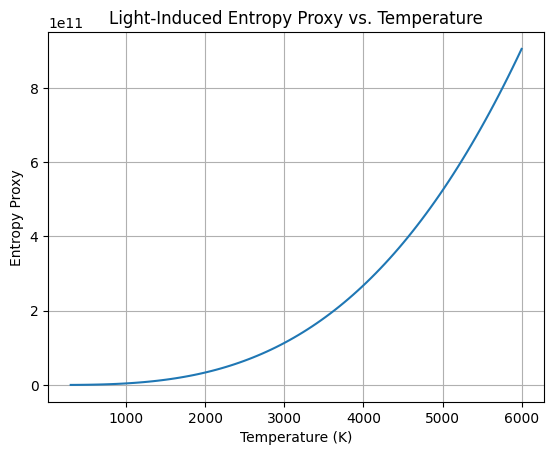

Optimized Negentropy Inputs: 100.0 6.0 6.0
Prime Factors: {'light': {2: 2, 5: 2}, 'co2': {2: 1, 3: 1}, 'water': {2: 1, 3: 1}}
Entropy Sample at T=300K: 113097335.52923255 at T=6000K: 904778684233.8604


In [1]:
# Entropy/Negentropy Simulation for Photosynthesis/PV
# Optimizes negentropy inputs (proxy for photosynthesis) and plots entropy scaling,
# factoring results into primes per PWT.

import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value

# Negentropy Optimization (maximize 'order' proxy for glucose production)
prob = LpProblem("Photosynthesis_Negentropy", LpMaximize)
light = LpVariable("Light_Energy", lowBound=0)  # Input photons/energy
co2 = LpVariable("CO2", lowBound=0)
water = LpVariable("Water", lowBound=0)

# Objective: Proxy for glucose output
prob += 6*co2 + 6*water + light

# Constraints (stoichiometry and light limit)
prob += light <= 100  # Arbitrary max light (prime-scalable)
prob += co2 == 6
prob += water == 6

prob.solve()

# Factorize outputs (using sympy for prime factors)
import sympy as sp
light_val = value(light)
co2_val = value(co2)
water_val = value(water)
factors = {
    'light': sp.factorint(int(light_val)),
    'co2': sp.factorint(int(co2_val)),
    'water': sp.factorint(int(water_val))
}

# Entropy Plot (blackbody proxy, S ~ T^3)
T = np.linspace(300, 6000, 100)  # Kelvin (e.g., room to solar)
entropy = (4/3) * np.pi * (T**3)  # Simplified entropy proxy
plt.plot(T, entropy)
plt.title('Light-Induced Entropy Proxy vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy Proxy')
plt.grid(True)
plt.savefig('entropy_plot.png')  # For blog embed
plt.show()

# Output for blog
print("Optimized Negentropy Inputs:", light_val, co2_val, water_val)
print("Prime Factors:", factors)
print("Entropy Sample at T=300K:", entropy[0], "at T=6000K:", entropy[-1])